# PROJECT: INVESTIGATE WHY NO-SHOW APPOINTMENTS OCCUR
## TABLE OF CONTENTS
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset comprises many characteristics of a patient, like gender, day of schedule, age and other and also if that patient assisted to the medical appointment. The objective of analyzing this dataset is to determine what characteristics of a patient may influence their assistance to the date. 
During the analysis of this dataset I want to explore:
* What is the mean age for no-show and show appointments?
* What gender usually don't assist to the appointments?
* People living in which neighborhood are more prone to not going to the appointments?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import sns as seaborn

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

The dataset is loaded and the first 5 lines are shown. The shape of the dataset is also shown: 110527 rows, and 14 columns

In [4]:
df= pd.read_csv('NSA.csv')
print('Shape of the dataset ',df.shape)
df.head()

Shape of the dataset  (110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


As we can see above, there are not missing values in any of the features. 

In [6]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

The cell above allow us to see the types of the features. There are integers, floats and strings

In [7]:
sum(df.duplicated())

0

There are not duplicated values in the dataset

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There are incoherent values in the age with a minimum value of -1. 

In [9]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Comparing the number of examples and the number of PatientID, I would assume many had more than one appointment in different dates. The dates are showing appointments done in 27 different days. People taken for the study live in 81 different neighborhoods. The values of Scholarship, Hipertension, Diabetes, Alcoholism, SMS_received are binary. There are 5 different handicap included in this study.

### DATA CLEANING

#### ELIMINATING INCONSISTENT VALUES

In [42]:
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [43]:
df.drop([99832],axis=0, inplace=True)

The rows with an age below 0 are eliminated; however, the rows with values higher than 100 are kept, because although they are uncommon, it can be possible.

#### CHANGING THE NAME OF A COLUMN

In [73]:
df.rename(columns={'Neighbourhood':'Neighborhood', 'Handcap':'Handicap'}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The misspelling in the name of two columns was corrected.

<a id='eda'></a>
## EXPLORATORY DATA ANALYSIS

#### 1. What is the mean age for no-show and show appointments?

In [63]:
age=df.groupby('No-show')['Age'].mean()
age

No-show
No     37.790064
Yes    34.317667
Name: Age, dtype: float64

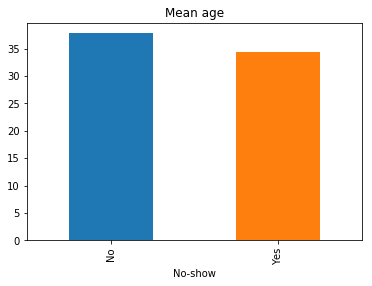

In [64]:
age=df.groupby('No-show')['Age'].mean().plot(kind='bar', title='Mean age')

Text(0, 0.5, 'Frequency')

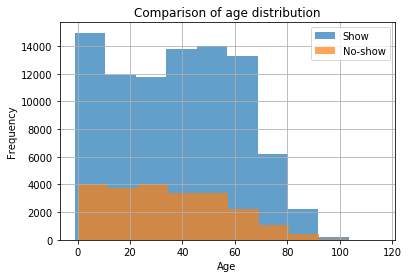

In [65]:
show= df[df['No-show']=='No']
no_show= df[df['No-show']=='Yes']

show['Age'].hist(alpha= 0.7, label='Show')
no_show['Age'].hist(alpha= 0.7, label='No-show')
plt.legend()
plt.title('Comparison of age distribution');
plt.xlabel('Age')
plt.ylabel('Frequency')

There is not big difference in the mean age of both categories, people that went to the appointment have a mean age of 37 and people that did not go to the appointment have an average age of 34. The distribution of both categories is similar, and slightly skewed to the right.

#### 2. What gender usually don't assist to the appointments?

In [66]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [67]:
df2= df[df['No-show']=='Yes']
df2['Gender'].value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

In [68]:

gender= df2.groupby('Gender').count()['No-show']
total= df.groupby('Gender').count()['No-show']
proportion= gender/total

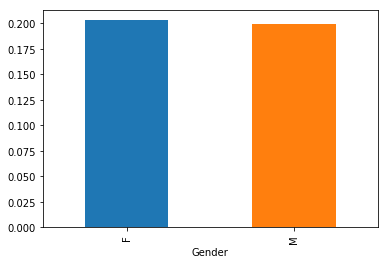

In [69]:
proportion.plot(kind='bar')

We can observe that in general, women make more appointments than men, with 71840 women compared to 38687 men. However, an equal proportion of each gender don't assist to the appointments, and that proportion is approximately 0.2 for both categories, being slightly superior for women. 

#### 3. People living in which neighborhood are more prone to not going to the appointments?

In [71]:
df2['Neighborhood'].value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
JESUS DE NAZARETH               696
JARDIM DA PENHA                 631
CARATOÍRA                       591
TABUAZEIRO                      573
BONFIM                          550
ILHA DO PRÍNCIPE                532
ANDORINHAS                      521
SÃO PEDRO                       515
SANTO ANDRÉ                     508
SANTA MARTHA                    496
SANTO ANTÔNIO                   484
ROMÃO                           474
GURIGICA                        456
JABOUR                          451
DA PENHA                        429
SÃO JOSÉ                        428
MARUÍPE                         424
NOVA PALESTINA                  402
BELA VISTA                      384
SANTOS DUMONT                   369
SÃO CRISTÓVÃO                   363
ILHA DE SANTA MARIA             361
FORTE SÃO JOÃO              

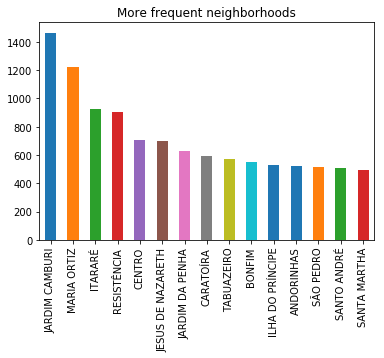

In [72]:
df2['Neighborhood'].value_counts()[0:15].plot(kind='bar', title='More frequent neighborhoods')

In the graphic, the first 15 neighborhoods where people that did not show to the appointment live are shown. Among the most common ones are Jardim Camburi with 1465, Maria Ortiz with 1219, Itarare with 923 and Resistencia with 906

<a id='conclusions'></a>
## CONCLUSIONS 

Through this analysis I got to the following conclusions:
   * There is no significant difference between the mean age of both categories, and it may suggest that the age is not a principal factor to determine if a person is going to show up or not. The distribution of age for both categories is similar, being a little bit skewed to the right. 
   * We can conclude that in general women make more appointments than men, but that both genders have a similar proportion of not-attendance. 
   * There are neighborhoods with a higher amount of population that did not show up for the appointment. The most principal ones are Jardim Camburi, Maria Ortiz, Itarare and Resistencia. One possible explanation could be that the distance from those neighborhoods and the appointment location impacts in the attendance of a person to the appointment. 